<a href="https://colab.research.google.com/github/Ganesh9100/Raj9100/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MNIST Classification using CNNs</h1>

---



# Importing Keras Modules


In [1]:
#Importing important modules
import keras   # cnn using keras 
from keras.datasets import mnist    # auto split is done 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten    
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping   
#Installing Tensorboard for Colab

!pip install tensorboardcolab

Using TensorFlow backend.


# Loading the Dataset

<h3>Download train and test sets of  MNIST dataset</h3>

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<h4>Visualizing the dataset</h4>

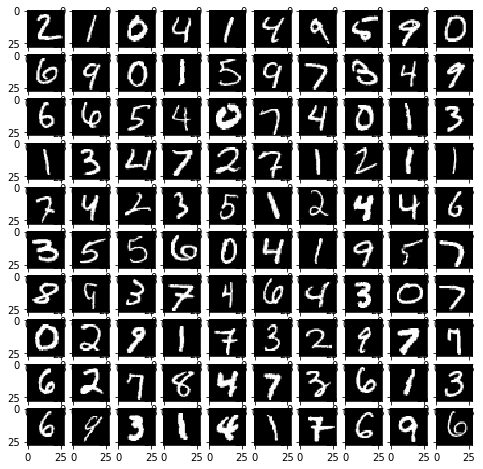

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):       # we need this loop to be over 100 iterations cz we want to fetch 100 images from test data 
    img = x_test[i]   # 100 images are loaded 
    fig.add_subplot(rows, columns, i)    # 10 x 10  and iis counter
    plt.imshow(img, cmap='gray')   
plt.show()

<h3>Reshape train and test sets into shapes compatible with keras models</h3>

<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [8]:
# print max value in xtrain
x_train.max()

255

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [10]:
# after normalising 
x_train.max()

1.0

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [12]:
print(y_train[0])  # down we are converting this 5 as one hot vector 

5


<h4>Convert Labels from digits to one hot vectors</h4>

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
print(y_train[0])  # this represnts 5 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

<h4>Define the layers of model</h4>

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

<h4>Setting Optimizer and Loss function for training</h4>

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Training the CNN 

<h4>Initializing the Tensorboard callback for visualization of training</h4>

In [21]:
#Import tensorboardcolab modules for creating a tensorboard call back which will passed in model.fit function.
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

#Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
tbc = TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://3a607a57.ngrok.io


<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)  # patience is same as epoch 

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

<h4>Fit the model to the dataset</h4>

In [24]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.2312 - accuracy: 0.9291 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 2/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0802 - accuracy: 0.9761 - val_loss: 0.0353 - val_accuracy: 0.9870
Epoch 3/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 4/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 5/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 6/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 7/12
60000/60000 [==============================] - 4s 59us/

# Evaluating the CNN

<h4>Evaluate trained model on the test set</h4>

In [25]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 66us/step
('Test loss:', 0.02537832819840944)
('Test accuracy:', 0.9923999905586243)


<h4>Visualizing some predictions</h4>

[[4.0714357e-10 4.3153072e-09 1.7513710e-05 7.2350439e-08 5.7813316e-12
  5.0864385e-13 5.8281076e-16 9.9998236e-01 4.1527098e-11 1.3287106e-09]]
7


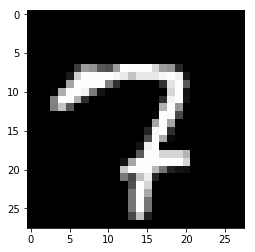

In [49]:
#x=model.predict(x_test[36].reshape(1,28,28,1))   # this will say the highest probability to corersponding class 
print((model.predict(x_test[36].reshape(1,28,28,1))))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")     # show in gray scale 
   
print(np.argmax(x))  # this will return the max value index    

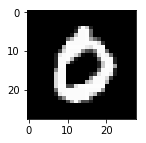

0


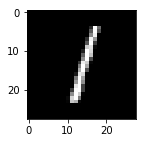

1


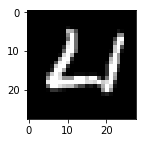

4


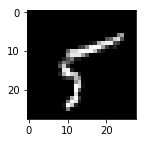

5


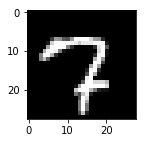

7


In [26]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))

# Saving the CNN

<h4>Save the trained weights and model in h5 files</h4>

In [0]:
#Set the path where you want to store the model and weights. 
model.save('./cnn_mnist.h5')
model.save_weights('./cnn_mnist_weights.h5')